synphot的api用途


In [2]:
import synphot
import numpy as np
from synphot.binning import calculate_bin_edges, calculate_bin_widths, calculate_bin_centers, wave_range, pixel_range
from astropy import units as u

In [3]:
# 示例波长箱中心
centers = np.array([1000, 2000, 3000])  # 单位：Angstrom

# 1. 计算波长箱的边缘
edges = calculate_bin_edges(centers)
print("波长箱中心：", centers)
print("计算得到的波长箱边缘：", edges)

# 2. 计算波长箱的宽度
widths = calculate_bin_widths(edges)
print("波长箱边缘：", edges)
print("计算得到的波长箱宽度：", widths)

# 3. 计算波长箱的中心（从边缘反推）
centers_from_edges = calculate_bin_centers(edges)
print("波长箱边缘：", edges)
print("从边缘反推得到的波长箱中心：", centers_from_edges)

# 4. 计算给定像素数量、中心波长的波长范围
cenwave = 2000 * u.AA # 中心波长
npix = 1  # 像素数量
waverange = wave_range(edges, cenwave, npix)
print("波长箱边缘：", edges)
print("中心波长：", cenwave)
print("像素数量：", npix)
print("计算得到的波长范围：", waverange)

# 5. 计算给定波长范围内的像素数量
waverange_input = [1500, 2500]* u.AA  # 给定的波长范围
npix_in_range = pixel_range(edges, waverange_input)
print("波长箱边缘：", edges)
print("给定的波长范围：", waverange_input)
print("计算得到的像素数量：", npix_in_range)

波长箱中心： [1000 2000 3000]
计算得到的波长箱边缘： [ 500. 1500. 2500. 3500.] Angstrom
波长箱边缘： [ 500. 1500. 2500. 3500.] Angstrom
计算得到的波长箱宽度： [1000. 1000. 1000.] Angstrom
波长箱边缘： [ 500. 1500. 2500. 3500.] Angstrom
从边缘反推得到的波长箱中心： [1000. 2000. 3000.] Angstrom
波长箱边缘： [ 500. 1500. 2500. 3500.] Angstrom
中心波长： 2000.0 Angstrom
像素数量： 1
计算得到的波长范围： (<Quantity 2000. Angstrom>, <Quantity 3000. Angstrom>)
波长箱边缘： [ 500. 1500. 2500. 3500.] Angstrom
给定的波长范围： [1500. 2500.] Angstrom
计算得到的像素数量： 1


In [5]:
import numpy as np
from astropy import units as u
from synphot.blackbody import blackbody_nu, blackbody_lambda, BlackBody1D
import matplotlib.pyplot as plt

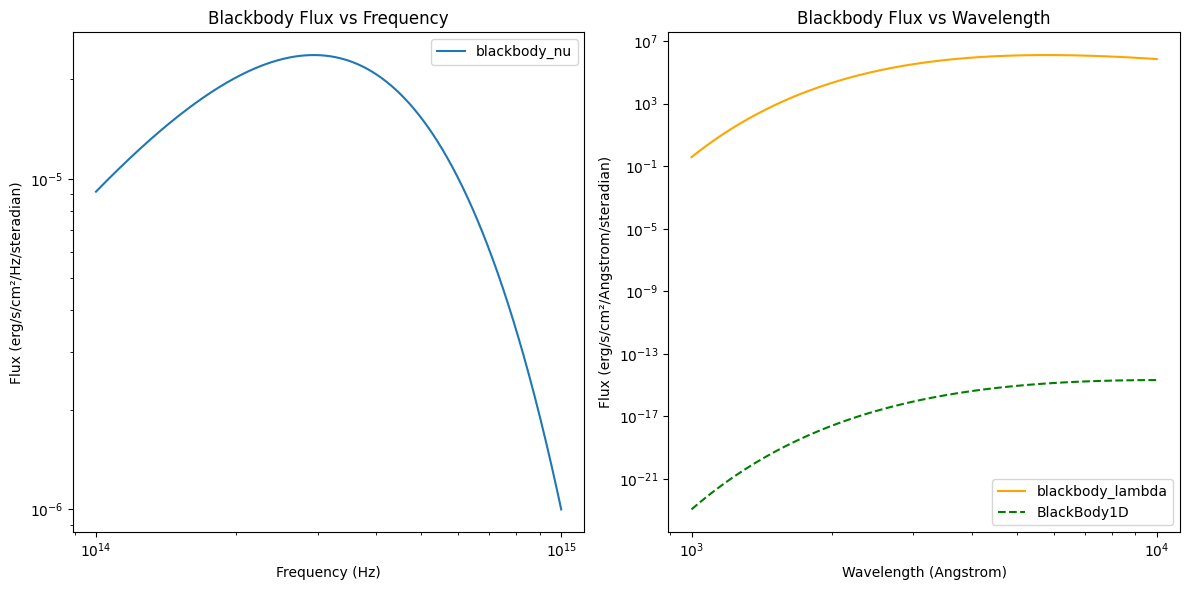

In [6]:
# 定义温度
temperature = 5000 * u.K

# 1. 使用 blackbody_nu 函数计算黑体在不同频率下的辐射通量
frequencies = np.logspace(14, 15, 1000) * u.Hz  # 频率范围：10^14 Hz 到 10^15 Hz
flux_nu = blackbody_nu(frequencies, temperature)

# 2. 使用 blackbody_lambda 函数计算黑体在不同波长下的辐射通量
wavelengths = np.logspace(3, 4, 1000) * u.AA  # 波长范围：10^3 Angstrom 到 10^4 Angstrom
flux_lambda = blackbody_lambda(wavelengths, temperature)

# 3. 使用 BlackBody1D 类创建黑体模型
bb_model = BlackBody1D(temperature=temperature)

# 计算黑体在不同波长下的辐射通量
flux_model = bb_model(wavelengths)

# 绘制结果
plt.figure(figsize=(12, 6))

# 绘制频率下的辐射通量
plt.subplot(1, 2, 1)
plt.loglog(frequencies, flux_nu, label='blackbody_nu')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (erg/s/cm²/Hz/steradian)')
plt.title('Blackbody Flux vs Frequency')
plt.legend()

# 绘制波长下的辐射通量
plt.subplot(1, 2, 2)
plt.loglog(wavelengths, flux_lambda, label='blackbody_lambda', color='orange')
plt.loglog(wavelengths, flux_model, label='BlackBody1D', linestyle='--', color='green')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/s/cm²/Angstrom/steradian)')
plt.title('Blackbody Flux vs Wavelength')
plt.legend()

plt.tight_layout()
plt.show()

这个异常检测疑似不能触发

In [7]:
import numpy as np
from astropy import units as u
from synphot import SourceSpectrum, Empirical1D
from synphot.exceptions import DuplicateWavelength, ZeroWavelength, UnsortedWavelength, OverlapError, PartialOverlap, DisjointError

# 示例波长和通量数据
wavelengths = np.array([1000, 2000, 3000, 4000]) * u.AA
fluxes = np.array([1e-14, 2e-14, 3e-14, 4e-14]) * u.erg / (u.cm**2 * u.s * u.AA)

# 创建一个源光谱
source = SourceSpectrum(Empirical1D, points=wavelengths, lookup_table=fluxes)

# 检查重复波长
try:
    wavelengths_with_duplicate = np.array([1000, 2000, 2000, 4000]) * u.AA
    source = SourceSpectrum(Empirical1D, points=wavelengths_with_duplicate, lookup_table=fluxes)
except DuplicateWavelength as e:
    print(f"DuplicateWavelength: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

# 检查零波长
try:
    wavelengths_with_zero = np.array([1000, 2000, 0, 4000]) * u.AA
    source = SourceSpectrum(Empirical1D, points=wavelengths_with_zero, lookup_table=fluxes)
except ZeroWavelength as e:
    print(f"ZeroWavelength: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

# 检查未排序波长
try:
    wavelengths_unsorted = np.array([2000, 1000, 3000, 4000]) * u.AA
    source = SourceSpectrum(Empirical1D, points=wavelengths_unsorted, lookup_table=fluxes)
except UnsortedWavelength as e:
    print(f"UnsortedWavelength: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

# 检查部分重叠
try:
    wavelengths_partial_overlap = np.array([1000, 2000, 2500, 4000]) * u.AA
    source1 = SourceSpectrum(Empirical1D, points=wavelengths_partial_overlap, lookup_table=fluxes)
    source2 = SourceSpectrum(Empirical1D, points=wavelengths_partial_overlap, lookup_table=fluxes)
    source1 + source2  # 这将触发 PartialOverlap 异常
except PartialOverlap as e:
    print(f"PartialOverlap: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

# 检查不连续数据
try:
    wavelengths_disjoint = np.array([1000, 2000, 3500, 4000]) * u.AA
    source1 = SourceSpectrum(Empirical1D, points=wavelengths_disjoint, lookup_table=fluxes)
    source2 = SourceSpectrum(Empirical1D, points=wavelengths_disjoint, lookup_table=fluxes)
    source1 + source2  # 这将触发 DisjointError 异常
except DisjointError as e:
    print(f"DisjointError: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")
print("所有异常测试完成。")

所有异常测试完成。


这一段看不懂

In [9]:
import numpy as np
from astropy import units as u
from synphot import SpectralElement, Empirical1D
from synphot.filter_parameterization import filter_from_fft, filter_to_fft, filters_to_fft_table

# 示例滤光片数据
wavelengths = np.linspace(1000, 4000, 1000) * u.AA
transmissions = np.exp(-((wavelengths - 2500 * u.AA) / (500 * u.AA))**2)

# 创建一个滤光片对象
filter_bp = SpectralElement(Empirical1D, points=wavelengths, lookup_table=transmissions)

# 将滤光片转换为 FFT 参数
fft_params = filter_to_fft(filter_bp, wavelengths=wavelengths, n_terms=10)
print("FFT 参数：", fft_params)

# 从 FFT 参数重建滤光片
# 注意：filter_from_fft 的参数需要根据实际函数签名进行调整
n_lambda = len(wavelengths)
lambda_0 = wavelengths[0]
delta_lambda = np.median(np.diff(wavelengths))
tr_max = np.max(transmissions)

print("FFT 参数的结构：", fft_params)
print("FFT 参数的类型：", type(fft_params))
print("FFT 参数的长度：", len(fft_params))

# 提取 FFT 参数
n_lambda, lambda_0, delta_lambda, tr_max, fft_parameters = fft_params

# 确保 fft_parameters 是一个 NumPy 数组
fft_params_array = np.array(fft_parameters, dtype=complex)

# 从 FFT 参数重建滤光片
reconstructed_filter_bp = filter_from_fft(n_lambda, lambda_0.value, delta_lambda.value, tr_max.value, fft_params_array)
print("重建的滤光片：", reconstructed_filter_bp)

# 将多个滤光片转换为 FFT 参数并存储在表格中
filters_mapping = {
    'filter1': (filter_bp, wavelengths),
    'filter2': (filter_bp, wavelengths)  # 这里使用相同的滤光片作为示例
}


fft_table = filters_to_fft_table(filters_mapping, n_terms=10)
print("FFT 参数表格：")
print(fft_table)

FFT 参数： (1000, <Quantity 1000. Angstrom>, <Quantity 3.003003 Angstrom>, <Quantity 0.99999098>, [(295.1072930488464+0j), (-224.59675105599877-1.4097917481477915j), (98.98603221480587+1.2427177980299162j), (-25.27547701465134-0.4760118271928662j), (3.731715653208383+0.09371424240464757j), (-0.3237487824484555-0.010164044636313062j), (0.012630554900042945+0.00047591004594470243j), (-0.003187020114813037-0.00014012261749942338j), (-0.0023021428504633283-0.00011569998334847977j), (-0.00196274618531256-0.00011099790557269904j)])
FFT 参数的结构： (1000, <Quantity 1000. Angstrom>, <Quantity 3.003003 Angstrom>, <Quantity 0.99999098>, [(295.1072930488464+0j), (-224.59675105599877-1.4097917481477915j), (98.98603221480587+1.2427177980299162j), (-25.27547701465134-0.4760118271928662j), (3.731715653208383+0.09371424240464757j), (-0.3237487824484555-0.010164044636313062j), (0.012630554900042945+0.00047591004594470243j), (-0.003187020114813037-0.00014012261749942338j), (-0.0023021428504633283-0.000115699983

BlackBody1D：黑体光谱模型。
BlackBodyNorm1D：归一化的黑体光谱模型。
Box1D：一维方框模型。
ConstFlux1D：一维常数通量模型。
Empirical1D：基于采样的经验光谱模型。
Gaussian1D：一维高斯模型。
GaussianAbsorption1D：一维高斯吸收模型。
GaussianFlux1D：一维高斯通量模型。
Lorentz1D：一维洛伦兹模型。
MexicanHat1D：一维墨西哥帽模型。
RickerWavelet1D：一维 Ricker 波模型。
PowerLawFlux1D：一维幂律通量模型。
Trapezoid1D：一维梯形模型。

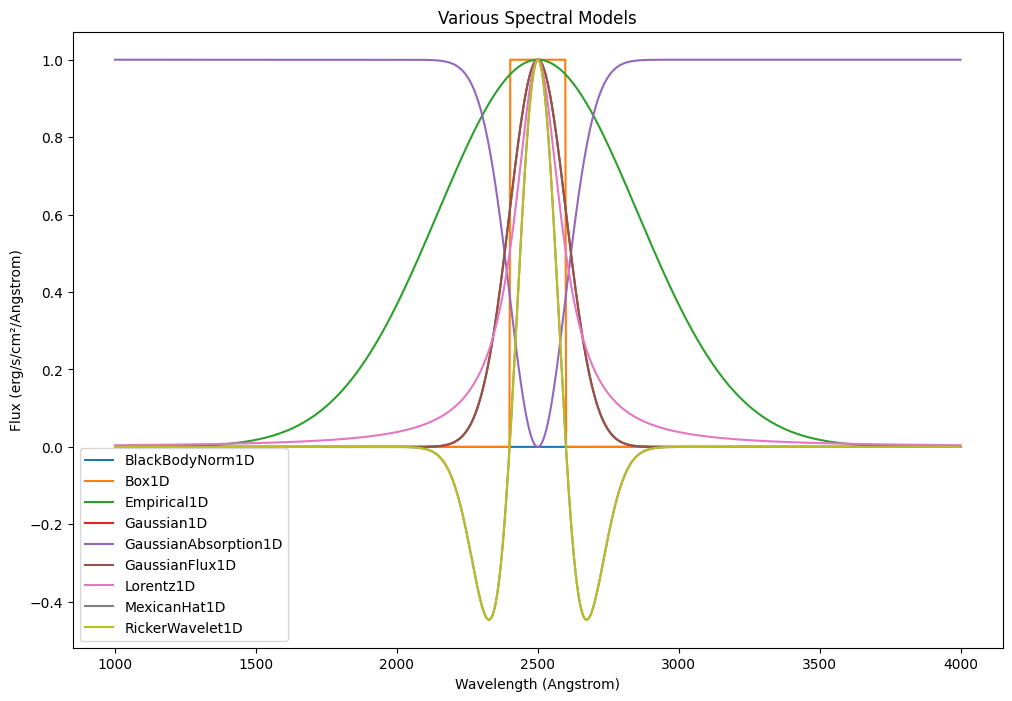

In [10]:
import numpy as np
from astropy import units as u
from synphot.models import (
    BlackBody1D, BlackBodyNorm1D, Box1D, ConstFlux1D, Empirical1D,
    Gaussian1D, GaussianAbsorption1D, GaussianFlux1D, Lorentz1D,
    MexicanHat1D, RickerWavelet1D, PowerLawFlux1D, Trapezoid1D
)
import matplotlib.pyplot as plt

# 示例波长范围
wavelengths = np.linspace(1000, 4000, 1000) * u.AA

# 1. BlackBody1D
bb_model = BlackBody1D(temperature=5000 * u.K)
bb_flux = bb_model(wavelengths)

# 2. BlackBodyNorm1D
bb_norm_model = BlackBodyNorm1D(temperature=5000 * u.K)
bb_norm_flux = bb_norm_model(wavelengths)

# 3. Box1D
box_model = Box1D(amplitude=1, x_0=2500 * u.AA, width=200 * u.AA)
box_flux = box_model(wavelengths)

# 4. ConstFlux1D
# # 使用 PHOTLAM 单位
# const_model = ConstFlux1D(amplitude=1e-14 * u.PHOTLAM)
# const_flux = const_model(wavelengths)

# 5. Empirical1D
transmissions = np.exp(-((wavelengths - 2500 * u.AA) / (500 * u.AA))**2)
empirical_model = Empirical1D(points=wavelengths, lookup_table=transmissions)
empirical_flux = empirical_model(wavelengths)

# 6. Gaussian1D
gaussian_model = Gaussian1D(amplitude=1, mean=2500 * u.AA, stddev=100 * u.AA)
gaussian_flux = gaussian_model(wavelengths)

# 7. GaussianAbsorption1D
gaussian_absorption_model = GaussianAbsorption1D(amplitude=1, mean=2500 * u.AA, stddev=100 * u.AA)
gaussian_absorption_flux = gaussian_absorption_model(wavelengths)

# 8. GaussianFlux1D
gaussian_flux_model = GaussianFlux1D(amplitude=1, mean=2500 * u.AA, stddev=100 * u.AA)
gaussian_flux_flux = gaussian_flux_model(wavelengths)

# 9. Lorentz1D
lorentz_model = Lorentz1D(amplitude=1, x_0=2500 * u.AA, fwhm=200 * u.AA)
lorentz_flux = lorentz_model(wavelengths)

# 10. MexicanHat1D
mexican_hat_model = MexicanHat1D(amplitude=1, x_0=2500 * u.AA, sigma=100 * u.AA)
mexican_hat_flux = mexican_hat_model(wavelengths)

# 11. RickerWavelet1D
ricker_wavelet_model = RickerWavelet1D(amplitude=1, x_0=2500 * u.AA, sigma=100 * u.AA)
ricker_wavelet_flux = ricker_wavelet_model(wavelengths)

# 12. PowerLawFlux1D
power_law_model = PowerLawFlux1D(amplitude=1e-14 * u.erg / (u.cm**2 * u.s * u.AA), x_0=2500 * u.AA, alpha=-2)
#power_law_flux = power_law_model(wavelengths)

# 13. Trapezoid1D
trapezoid_model = Trapezoid1D(amplitude=1, x_0=2500 * u.AA, width=200 * u.AA, slope=0.1)
#trapezoid_flux = trapezoid_model(wavelengths)

# 绘制所有模型的光谱
plt.figure(figsize=(12, 8))

#plt.plot(wavelengths, bb_flux, label='BlackBody1D')
plt.plot(wavelengths, bb_norm_flux, label='BlackBodyNorm1D')
plt.plot(wavelengths, box_flux, label='Box1D')
#plt.plot(wavelengths, const_flux, label='ConstFlux1D')
plt.plot(wavelengths, empirical_flux, label='Empirical1D')
plt.plot(wavelengths, gaussian_flux, label='Gaussian1D')
plt.plot(wavelengths, gaussian_absorption_flux, label='GaussianAbsorption1D')
plt.plot(wavelengths, gaussian_flux_flux, label='GaussianFlux1D')
plt.plot(wavelengths, lorentz_flux, label='Lorentz1D')
plt.plot(wavelengths, mexican_hat_flux, label='MexicanHat1D')
plt.plot(wavelengths, ricker_wavelet_flux, label='RickerWavelet1D')
#plt.plot(wavelengths, power_law_flux, label='PowerLawFlux1D')
#plt.plot(wavelengths, trapezoid_flux, label='Trapezoid1D')

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/s/cm²/Angstrom)')
plt.title('Various Spectral Models')
plt.legend()
plt.show()

In [11]:
import numpy as np
from astropy import units as u
from synphot.models import ConstFlux1D, PowerLawFlux1D, Trapezoid1D
from synphot.units import PHOTLAM  # 从 synphot.units 导入 PHOTLAM
import matplotlib.pyplot as plt

# 示例波长范围
wavelengths = np.linspace(1000, 4000, 1000) * u.AA

# 1. ConstFlux1D
const_model = ConstFlux1D(amplitude=1e-14)  # 使用 PHOTLAM 作为单位
const_flux = const_model(wavelengths)

# 2. PowerLawFlux1D
power_law_model = PowerLawFlux1D(amplitude=1e-14 * PHOTLAM, x_0=2500 * u.AA, alpha=-2)
power_law_flux = power_law_model(wavelengths)

# 3. Trapezoid1D
trapezoid_model = Trapezoid1D(amplitude=1e-14 * PHOTLAM, x_0=2500 * u.AA, width=200 * u.AA, slope=0.1)
trapezoid_flux = trapezoid_model(wavelengths)

# 绘制这些模型的光谱
plt.figure(figsize=(12, 8))

plt.plot(wavelengths, const_flux, label='ConstFlux1D')
plt.plot(wavelengths, power_law_flux, label='PowerLawFlux1D')
plt.plot(wavelengths, trapezoid_flux, label='Trapezoid1D')

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (PHOTLAM)')
plt.title('Photon Flux Models')
plt.legend()
plt.show()

UnitsError: Angstrom PHOTLAM and PHOTLAM are not convertible

In [12]:
import numpy as np
from astropy import units as u
from synphot import SourceSpectrum, SpectralElement, Empirical1D, Observation
from synphot.reddening import ExtinctionModel1D, etau_madau

# 示例源光谱数据
wavelengths = np.linspace(1000, 4000, 1000) * u.AA
fluxes = np.exp(-((wavelengths - 2500 * u.AA) / (500 * u.AA))**2) * u.erg / (u.cm**2 * u.s * u.AA)

# 创建源光谱
source = SourceSpectrum(Empirical1D, points=wavelengths, lookup_table=fluxes)

# 示例带通滤光片数据
transmissions = np.exp(-((wavelengths - 2500 * u.AA) / (500 * u.AA))**2)
filter_bp = SpectralElement(Empirical1D, points=wavelengths, lookup_table=transmissions)

# 创建观测光谱
observation = Observation(source, filter_bp)

print(dir(observation))

# 计算观测光谱的积分通量
binflux = observation.binflux
#print("积分通量：", binflux)

# 计算观测光谱的能量通量
flam = observation.effstim('flam')
print("能量通量：", flam)

# 获取有效刺激量
effstim = observation.effstim
print("有效刺激量：", effstim)

# 计算观测光谱的观测星等
obsmag = observation.effstim('abmag')
print("观测星等（ABMAG）：", obsmag)

# 计算观测光谱的 VEGAMAG 星等
# 加载内置的 Vega 光谱
vegaspec = SourceSpectrum.from_vega()

# 计算观测光谱的 VEGAMAG 星等
vegamag = observation.effstim('vegamag', vegaspec=vegaspec)
print("VEGAMAG 星等：", vegamag)


# 将观测光谱转换为 Spectrum1D 对象
spectrum1d = observation.as_spectrum()
print("Spectrum1D 对象：", spectrum1d)

# 计算观测光谱的平均波长
avgwave = observation.avgwave
print("平均波长：", avgwave)

# 计算观测光谱的有效波长
effective_wavelength = observation.effective_wavelength
print("有效波长：", effective_wavelength)

# 在指定波长范围内对观测光谱进行积分
integrated_flux = observation.integrate()
print("积分结果：", integrated_flux)

# 使用 Madau 1995 消光模型计算消光值
z = 1.0  # 红移
extinction_values = etau_madau(wavelengths, z)
print("Madau 1995 消光值：", extinction_values)

# 创建消光模型
extinction_model = ExtinctionModel1D(points=wavelengths, lookup_table=extinction_values)
print("消光模型：", extinction_model)

# 使用消光模型计算特定波长下的消光值
specific_wavelength = 2500 * u.AA
specific_extinction = extinction_model(specific_wavelength)
print("特定波长下的消光值：", specific_extinction)

['__add__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_band', '_bin_edges', '_binflux', '_binset', '_do_plot', '_force', '_get_arrays', '_get_binned_arrays', '_get_meta', '_init_bins', '_internal_flux_unit', '_internal_wave_unit', '_merge_meta', '_model', '_model_fconv_wav', '_model_param_dict', '_process_flux_param', '_process_generic_param', '_process_wave_param', '_spec', '_validate_binned_wavelengths', '_validate_flux_unit', '_validate_other_mul_div', '_validate_wavelengths', 'as_spectrum', 'avgwave', 'bandpass', 'barlam', 'bin_edges', 'binflux', 'binned_pixelrange', 'binned_waverange', 'binset', '

TypeError: '<' not supported between instances of 'ExtinctionCurve' and 'int'